NAMA : MICHAEL WILBERT PURADISASTRA

BATCH : RMT-037

# A. Import Library

In [274]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# B. Data Loading

| Column   | Description |
|----------|-------------|
| age      | Age of the insurance policyholder |
| sex      | Gender of the insurance policyholder (male or female) |
| bmi      | Body Mass Index of the policyholder, a measure of body fat based on height and weight |
| children | Number of children or dependents covered by the insurance policy |
| smoker   | Indicates if the policyholder is a smoker (yes or no) |
| region   | Residential area of the policyholder within the United States (northeast, northwest, southeast, southwest) |
| charges  | Medical insurance cost billed to the policyholder (USD) |

In [233]:
# Load data file
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# C. Data Understanding


## C.1 Problem Statement
The high cost of healthcare in the United States makes health insurance a necessity for many residents. However, insurance premiums vary based on personal factors, making it hard to predict individual costs. This notebook aims to predict annual insurance premium costs for individuals based on relevant data.

## C.2 SMART Framework
- **Specific**: Predict the annual health insurance premium based on individual data.
- **Measurable**: Use historical data to estimate premiums with error metrics like MAE or RMSE.
- **Achievable**: Given the dataset and model tools, a prediction model is feasible.
- **Relevant**: Accurate premium predictions aid financial planning for health insurance.
- **Time-Bound**: Completion and validation of the model will occur within the project timeline.



## C.3 Model Selection: Regression
This problem requires predicting a continuous numerical value (insurance charges), so **Regression** is the most suitable machine learning model type.



## C.4 Business Understanding
Accurate predictions of insurance premiums help individuals budget effectively, especially given the rising healthcare costs. By understanding the key factors influencing premium costs, individuals and insurance providers can make informed decisions, potentially driving more customized insurance plans and cost management strategies.



## C.5 Problem Statement for EDA
To better understand the variables in the dataset, we will focus on:
- Age, BMI, and Smoking Status: Factors that may strongly influence premium costs.
- Number of Children: Family size could impact premium levels.
- Region: Location-specific costs could vary.

EDA will focus on analyzing these variables, their distributions, correlations, and their potential impact on premium charges.


## C.6 Data Info


In [234]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [235]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# D. Data Cleaning

## D.1 Check for Missing Values

In [236]:
# Check for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [237]:
# Encode categorical variables
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)
insurance_data_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## D.2 Plotting

### D.2.1 **Histogram of Charges**

The distribution of insurance charges is heavily right-skewed. Most individuals are paying lower insurance charges, with a significant drop in the count as charges increase. The skewed distribution suggests that higher charges are less common, likely concentrated among certain groups (e.g., smokers, older individuals, or those with higher BMIs).

Text(0.5, 1.0, 'Histogram of Charges')

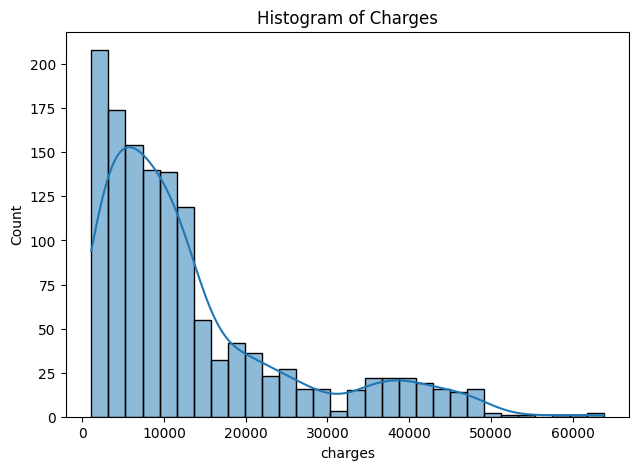

In [238]:
# Create Histogram and Scatter plot

plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(insurance_data['charges'], kde = True, bins = 30)
plt.title('Histogram of Charges')

### D.2.2 **BMI vs. Charges Scatter Plot**

There appears to be a positive trend between BMI and charges, indicating that individuals with higher BMIs tend to have higher insurance charges.
While there is an upward trend, the relationship isn’t strictly linear, as there’s a lot of variation in charges across similar BMI values. This could imply that other factors, like smoking status and age, play a role in determining charges even at the same BMI levels.

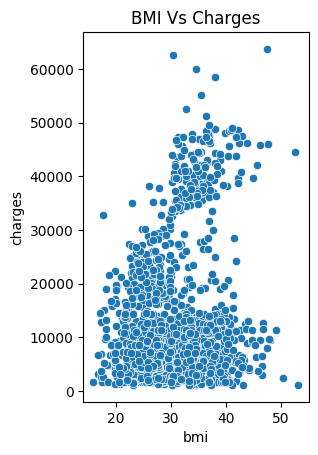

In [239]:
plt.subplot(1,2,2)
sns.scatterplot(x = 'bmi', y = 'charges', data= insurance_data)
plt.title('BMI Vs Charges')
plt.show()

### D.2.3 **Age vs. Charges Scatter Plot (Colored by Smoking Status)**

Smokers (blue points) tend to have much higher insurance charges than non-smokers (orange points) at all age levels. Additionally, charges generally increase with age for both smokers and non-smokers, although smokers consistently incur higher charges.
Age and smoking are both influential factors for charges, with smokers facing a substantial surcharge. This suggests that the model should incorporate both variables as key predictors, as they strongly impact insurance costs.

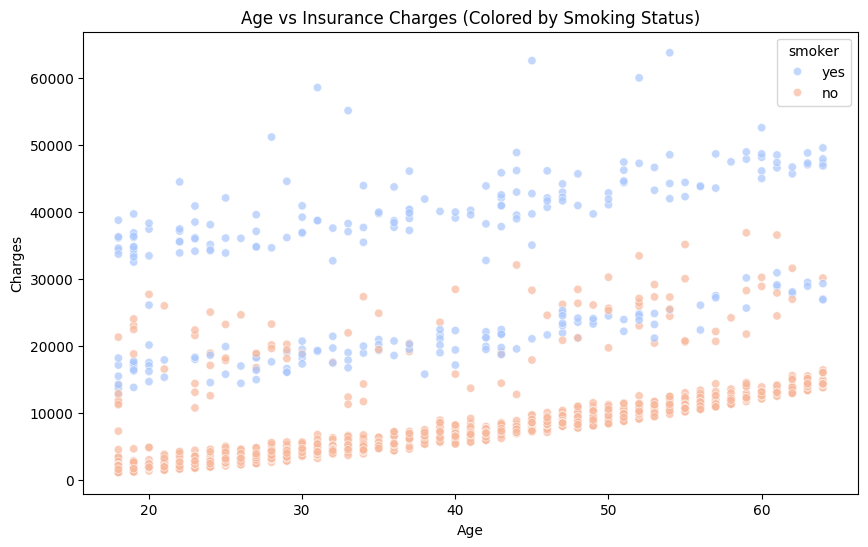

In [240]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.7)
plt.title("Age vs Insurance Charges (Colored by Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

### D.2.4 **Insurance Charges by Sex and Smoking Status Box Plot**

Smokers (blue boxes) have significantly higher charges than non-smokers (orange boxes) across both sexes. While there is some variation between males and females, the difference in charges between smokers and non-smokers is much more prominent.
Smoking is a primary driver of insurance charges, and while sex does cause some variability, it is not as significant. This box plot reinforces the observation that smokers bear much higher insurance costs, irrespective of gender.

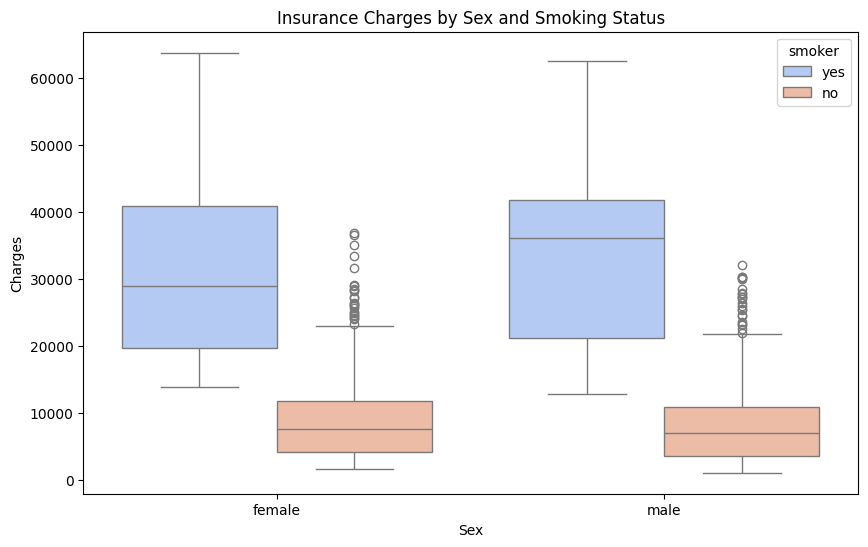

In [241]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='sex', y='charges', hue='smoker', palette='coolwarm')
plt.title("Insurance Charges by Sex and Smoking Status")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()

### D.2.5 **Insurance Charges by Region**

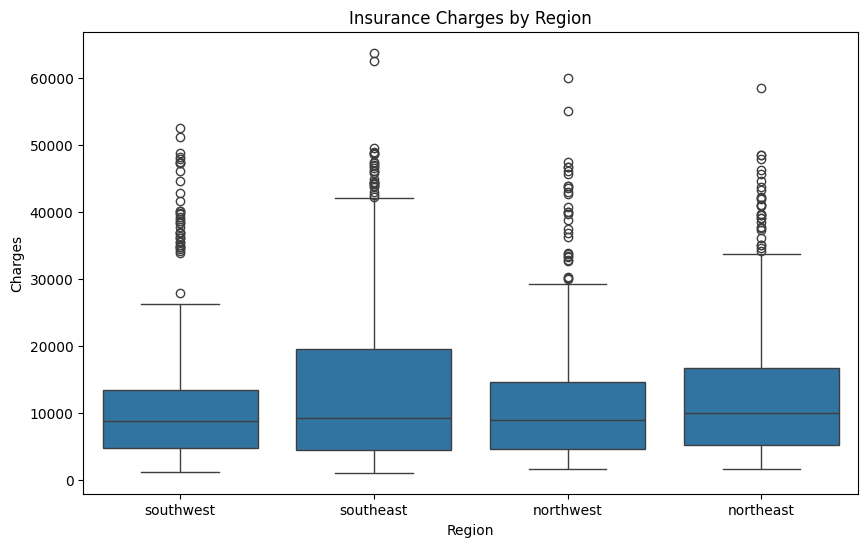

In [242]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='region', y='charges')
plt.title("Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

There may be slight regional effects on charges, with the Southeast showing slightly higher variability, but overall, region does not appear to be a major driver of insurance costs. This factor shows minimal impact on charges, as there is no consistent trend across categories.

### D.2.6 **Insurance Charges by Children**

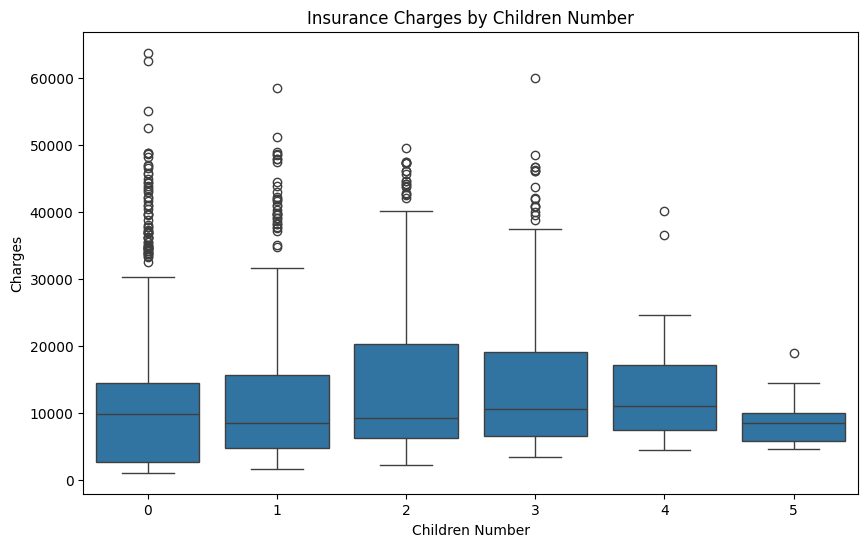

In [243]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_data, x='children', y='charges')
plt.title("Insurance Charges by Children Number")
plt.xlabel("Children Number")
plt.ylabel("Charges")
plt.show()

This suggests that the number of children is not a significant predictor of insurance premiums. These insights indicate that region and number of children may have minimal influence on insurance charges compared to other variables like age, BMI, and smoking status.

### D.2.7 **Summary**

The analysis of these plots reveals that:

***Smoking*** and ***age*** are major factors contributing to higher insurance charges.
Higher ***BMI*** is associated with increased charges, although other factors introduce variability.
***Sex*** has a minor influence on charges compared to smoking status and age.

In conclusion, a predictive model should focus on ***age, smoker, and BMI*** as primary variables for estimating insurance charges.

# E. Check Cardinality

In [244]:
# Inspect the cardinality

print('Number of categories in the variable Age         : {}'.format(len(insurance_data.age.unique())))
print('Number of categories in the variable Sex         : {}'.format(len(insurance_data.sex.unique())))
print('Number of categories in the variable BMI         : {}'.format(len(insurance_data.bmi.unique())))
print('Number of categories in the variable Children    : {}'.format(len(insurance_data.children.unique())))
print('Number of categories in the variable Smoker      : {}'.format(len(insurance_data.smoker.unique())))
print('Number of categories in the variable Region      : {}'.format(len(insurance_data.region.unique())))
print('Number of categories in the variable Charges     : {}'.format(len(insurance_data.charges.unique())))

Number of categories in the variable Age         : 47
Number of categories in the variable Sex         : 2
Number of categories in the variable BMI         : 548
Number of categories in the variable Children    : 6
Number of categories in the variable Smoker      : 2
Number of categories in the variable Region      : 4
Number of categories in the variable Charges     : 1337


The variables `Sex` and `Smoker` have only 2 categories each, while `Region` has 4 and `Number of Children` has 6 categories, indicating low cardinality. In contrast, the `Age`, `BMI` and `Charges` variables, as anticipated, have a large number of unique values, indicating high cardinality.

# F. Experiment

In [245]:
insurance_data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [246]:
insurance_data.bmi.unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

## F.1 **Age Binning**

Young: 18–30

Middle-aged: 31–50

Senior: 51 and above

In [247]:
# Define age bins in increasing order
bins_age = [insurance_data['age'].min(), 30, 50, insurance_data['age'].max()]
labels_age = ['Young', 'Middle-aged', 'Senior']

# Apply binning to age
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=bins_age, labels=labels_age, include_lowest=True)


## F.2 **BMI Binning**

Underweight: BMI < 18.5

Normal weight: 18.5 ≤ BMI < 25

Overweight: 25 ≤ BMI < 30

Obese: BMI ≥ 30

In [248]:
# Define BMI bins and labels
bins_bmi = [insurance_data['bmi'].min(), 18.5, 25, 30, insurance_data['bmi'].max()]
labels_bmi = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Apply binning to BMI
insurance_data['bmi_category'] = pd.cut(insurance_data['bmi'], bins=bins_bmi, labels=labels_bmi, include_lowest=True)


## F.3 Encoding BMI & Age

In [249]:
# Encode 'bmi_category' to create 'bmi_category_encoded'
le_bmi = LabelEncoder()
insurance_data['bmi_category_encoded'] = le_bmi.fit_transform(insurance_data['bmi_category'])

# Check if encoding was successful
print(insurance_data[['bmi_category', 'bmi_category_encoded']].head())


    bmi_category  bmi_category_encoded
0     Overweight                     2
1          Obese                     1
2          Obese                     1
3  Normal weight                     0
4     Overweight                     2


In [250]:
# Encode 'age_group' to create 'age_group_encoded'
le_bmi = LabelEncoder()
insurance_data['age_group_encoded'] = le_bmi.fit_transform(insurance_data['age_group'])

# Check if encoding was successful
print(insurance_data[['age_group', 'age_group_encoded']].head(20))


      age_group  age_group_encoded
0         Young                  2
1         Young                  2
2         Young                  2
3   Middle-aged                  0
4   Middle-aged                  0
5   Middle-aged                  0
6   Middle-aged                  0
7   Middle-aged                  0
8   Middle-aged                  0
9        Senior                  1
10        Young                  2
11       Senior                  1
12        Young                  2
13       Senior                  1
14        Young                  2
15        Young                  2
16       Senior                  1
17        Young                  2
18       Senior                  1
19        Young                  2


In [251]:
# Count the 'bmi_category' column
print("BMI Category Counts:")
print(insurance_data['bmi_category'].value_counts())

# Count the 'age_group' column
print("\nAge Group Counts:")
print(insurance_data['age_group'].value_counts())


BMI Category Counts:
bmi_category
Obese            705
Overweight       386
Normal weight    226
Underweight       21
Name: count, dtype: int64

Age Group Counts:
age_group
Middle-aged    538
Young          444
Senior         356
Name: count, dtype: int64


In [252]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,bmi_category_encoded,age_group_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Overweight,2,2
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese,1,2
2,28,male,33.000,3,no,southeast,4449.46200,Young,Obese,1,2
3,33,male,22.705,0,no,northwest,21984.47061,Middle-aged,Normal weight,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Middle-aged,Overweight,2,0


# G. Handling Outlier

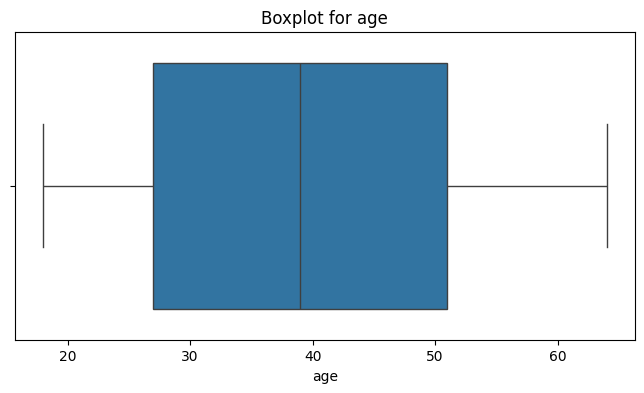

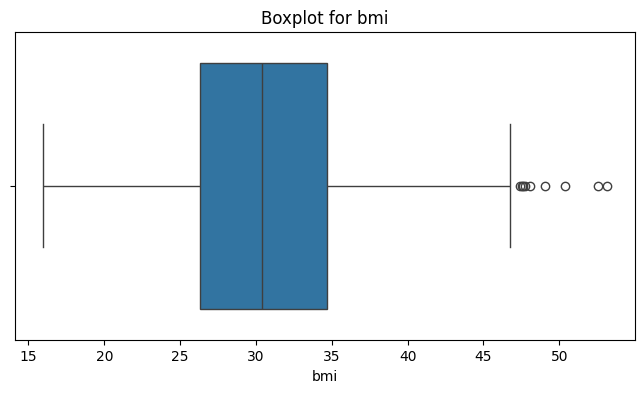

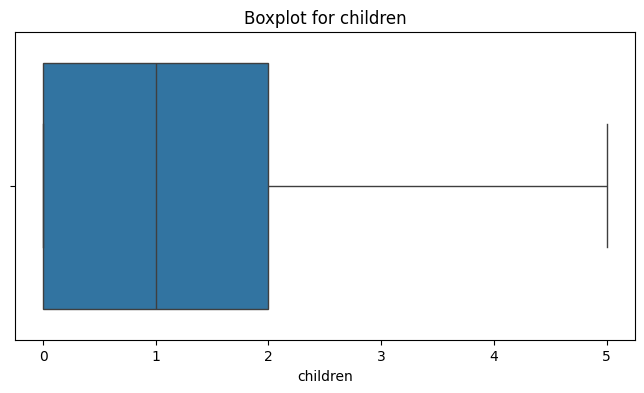

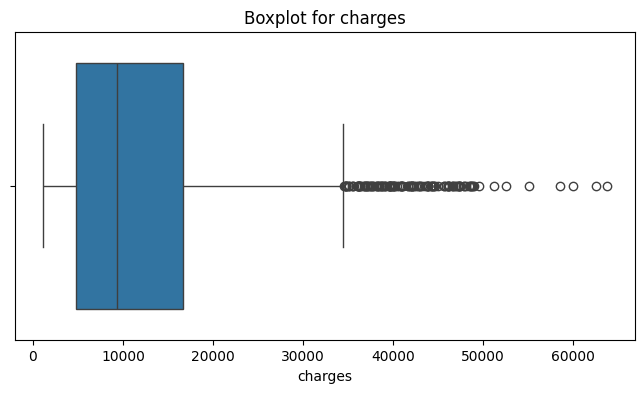

In [253]:
# Function to plot boxplots for detecting outliers in numerical columns
def plot_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.xlabel(column)
        plt.show()

# Identify numerical columns for outlier detection
numerical_columns = ['age', 'bmi', 'children', 'charges']
plot_outliers(insurance_data, numerical_columns)

In [254]:
# Censoring function to limit outliers to the 1st and 99th percentiles
def censor_outliers(df, columns):
    for column in columns:
        lower_limit = df[column].quantile(0.01)
        upper_limit = df[column].quantile(0.99)
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

# Apply censoring to the specified numerical columns
insurance_data_censored = censor_outliers(insurance_data.copy(), numerical_columns)

# Display the first few rows of the censored dataframe
insurance_data_censored.head()



,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category,bmi_category_encoded,age_group_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Overweight,2,2
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese,1,2
2,28,male,33.000,3,no,southeast,4449.46200,Young,Obese,1,2
3,33,male,22.705,0,no,northwest,21984.47061,Middle-aged,Normal weight,0,0
4,32,male,28.880,0,no,northwest,3866.85520,Middle-aged,Overweight,2,0


Censoring outliers at the 1st and 99th percentiles in the charges column reduces the influence of extreme values by clipping them to fall within these limits. This approach preserves all data points, unlike traditional outlier removal methods, allowing for a more balanced dataset without discarding any observations. By moderating the effect of extreme charges, especially very high values that could skew model predictions, censoring creates a more robust dataset.

Applying censoring can lead to more stable and accurate predictions in regression models, as it reduces the variance introduced by extreme values. Comparing model performance with and without censoring can help assess its effectiveness; in cases where outliers could distort results, censoring at the 1st and 99th percentiles often yields a dataset that better reflects typical patterns, contributing to more generalized and reliable model performance.

In [255]:
# Drop columns
data = insurance_data_censored.drop(['age', 'age_group', 'bmi','bmi_category'], axis=1)


In [256]:
data.head()

,sex,children,smoker,region,charges,bmi_category_encoded,age_group_encoded
0,female,0,yes,southwest,16884.92400,2,2
1,male,1,no,southeast,1725.55230,1,2
2,male,3,no,southeast,4449.46200,1,2
3,male,0,no,northwest,21984.47061,0,0
4,male,0,no,northwest,3866.85520,2,0


# H. Linear Regression

## H.1 Split Dataset

In [257]:
# Define features and target variable
X = data.drop(columns=['charges'])  # Features
y = data['charges']  # Target

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Print sizes of train and test sets
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (936, 6)
Test size  :  (402, 6)


X contains all features except the charges column.

y is set to the charges column, which is the target variable.

The dataset is split into 70% for training and 30% for testing by setting test_size=0.3. The random_state=0 ensures reproducibility of the split.

## H.2 Reshape Train-Set

In [258]:
# Reshape the train-set (because the dataset has a single feature )

X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

X_train

array([['female'],
       [0],
       ['no'],
       ...,
       ['northeast'],
       [1],
       [0]], dtype=object)

In [259]:
print(data.columns)

Index(['sex', 'children', 'smoker', 'region', 'charges',
       'bmi_category_encoded', 'age_group_encoded'],
      dtype='object')


## H.3 

In [261]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Define features and target variable
X = data.drop(columns=['charges'])
y = data['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# Apply scaling to the training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print sizes of train and test sets
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (936, 8)
Test size  :  (402, 8)


In [262]:
# Find the coefficents and the intercept using Scikit-Learn (Linear Regression)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercept   : ', lin_reg.intercept_)
print('Coefficient : ', lin_reg.coef_)

Intercept   :  13454.061000659187
Coefficient :  [  -25.41420016   439.68922243  9320.37668786  -441.43354106
 -1491.52228131   -13.53240129   289.61561161   -18.71692912]


The baseline medical charge, without any variable influence, is about $13,454 (Intercept). Smoking status has the largest impact on charges, making it crucial. Region and gender have minimal effects, so they could be less prioritized in pricing models.

In [265]:
def train_and_evaluate(X, y, model_name):
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    # Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=13)
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    
    # Calculate R² Score for Random Forest on both train and test sets
    rf_train_r2 = r2_score(y_train, rf_train_predictions)
    rf_test_r2 = r2_score(y_test, rf_test_predictions)
    
    # K-Nearest Neighbors Regressor
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    knn_train_predictions = knn_model.predict(X_train)
    knn_test_predictions = knn_model.predict(X_test)
    
    # Calculate R² Score for KNN on both train and test sets
    knn_train_r2 = r2_score(y_train, knn_train_predictions)
    knn_test_r2 = r2_score(y_test, knn_test_predictions)
    
    # Print R² Scores
    print(f"\n{model_name} - Random Forest Train R² Score: {rf_train_r2:.4f}")
    print(f"{model_name} - Random Forest Test R² Score: {rf_test_r2:.4f}")
    print(f"{model_name} - KNN Train R² Score: {knn_train_r2:.4f}")
    print(f"{model_name} - KNN Test R² Score: {knn_test_r2:.4f}")
# Ensure 'data' includes all relevant preprocessing steps
y = data['charges']  # Target variable
X_continuous = data.drop(columns=['charges'])  # Feature set excluding the target

# Call the function with the corrected data
train_and_evaluate(X_continuous, y, model_name="Without BMI Reduction")



Without BMI Reduction - Random Forest Train R² Score: 0.8939
Without BMI Reduction - Random Forest Test R² Score: 0.8727
Without BMI Reduction - KNN Train R² Score: 0.7602
Without BMI Reduction - KNN Test R² Score: 0.7292


In [ ]:
def train_and_evaluate_with_reduced_bmi(X, y, model_name):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    # Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=13)
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    
    # Calculate R² Score for Random Forest on both train and test sets
    rf_train_r2 = r2_score(y_train, rf_train_predictions)
    rf_test_r2 = r2_score(y_test, rf_test_predictions)
    
    # K-Nearest Neighbors Regressor
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    knn_train_predictions = knn_model.predict(X_train)
    knn_test_predictions = knn_model.predict(X_test)
    
    # Calculate R² Score for KNN on both train and test sets
    knn_train_r2 = r2_score(y_train, knn_train_predictions)
    knn_test_r2 = r2_score(y_test, knn_test_predictions)
    
    # Print R² Scores
    print(f"\n{model_name} - Random Forest Train R² Score: {rf_train_r2:.4f}")
    print(f"{model_name} - Random Forest Test R² Score: {rf_test_r2:.4f}")
    print(f"{model_name} - KNN Train R² Score: {knn_train_r2:.4f}")
    print(f"{model_name} - KNN Test R² Score: {knn_test_r2:.4f}")

# Call the function with the reduced BMI data
train_and_evaluate_with_reduced_bmi(X_reduced, y, model_name="With BMI Reduction")


With BMI Reduction - Random Forest Train R² Score: 0.8950
With BMI Reduction - Random Forest Test R² Score: 0.8513
With BMI Reduction - KNN Train R² Score: 0.7557
With BMI Reduction - KNN Test R² Score: 0.7000


| Algorithnm | Train-Set (without reduced bmi) | Test-Set (without reduced bmi) | Train-Set (with reduced bmi) | Test-Set (with reduced bmi)
| --- | --- | --- | --- | --- |
| Random Forest | 0.893 | 0.872 | 0.895 | 0.851 |
| KNN | 0.760 | 0.729 | 0.755 | 0.700 |


The Random Forest model achieves the highest predictive accuracy, with an R² of 0.872 on the test set without BMI reduction. Reducing BMI to a category slightly lowers accuracy for both Random Forest (to 0.851) and KNN (from 0.729 to 0.700), highlighting the value of the continuous BMI variable. Overall, Random Forest without BMI reduction is the best model for predicting insurance charges.

# I. Model Training

In [267]:
# Censoring function to limit outliers to the 1st and 99th percentiles
def censor_outliers(df, columns):
    for column in columns:
        lower_limit = df[column].quantile(0.01)
        upper_limit = df[column].quantile(0.99)
        df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

# Apply censoring to the specified numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges']
insurance_data_censored = censor_outliers(insurance_data.copy(), numerical_columns)

# Continue with the model training and evaluation
X = insurance_data_censored[['age', 'bmi', 'children']]  # Select numerical features for simplicity
y = insurance_data_censored['charges']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train the model using linear regression with and without fit_intercept
lr_with_intercept = LinearRegression(fit_intercept=True)
lr_without_intercept = LinearRegression(fit_intercept=False)

lr_with_intercept.fit(X_train, y_train)
lr_without_intercept.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [268]:
# 2. Train the model using Ridge and Lasso regression
ridge_model = Ridge(alpha=1.0)  # Default alpha value
lasso_model = Lasso(alpha=0.1)  # Set a small alpha for Lasso

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [269]:
# 3. Predict both train and test data using the models
predictions = {
    'LR_with_intercept_train': lr_with_intercept.predict(X_train),
    'LR_with_intercept_test': lr_with_intercept.predict(X_test),
    'LR_without_intercept_train': lr_without_intercept.predict(X_train),
    'LR_without_intercept_test': lr_without_intercept.predict(X_test),
    'Ridge_train': ridge_model.predict(X_train),
    'Ridge_test': ridge_model.predict(X_test),
    'Lasso_train': lasso_model.predict(X_train),
    'Lasso_test': lasso_model.predict(X_test),
}

In [270]:
# 4. Evaluate the models on train and test data by regression metrics
metrics = pd.DataFrame(columns=['Model', 'Data', 'MSE', 'MAE', 'R2_Score'])

def evaluate_model(pred, actual, model_name, data_type):
    mse = mean_squared_error(actual, pred)
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return pd.Series({'Model': model_name, 'Data': data_type, 'MSE': mse, 'MAE': mae, 'R2_Score': r2})

# Initialize a list to collect evaluation results
metrics_list = []

# Collect metrics for each model and dataset
for model_name, y_pred in predictions.items():
    data_type = 'Train' if 'train' in model_name.lower() else 'Test'
    model_type = model_name.split('_')[0]
    metrics_list.append(evaluate_model(y_pred, y_train if 'train' in model_name.lower() else y_test, model_type, data_type))

# Concatenate the list of metrics into a DataFrame
metrics = pd.concat(metrics_list, ignore_index=True)

In [272]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', lr_with_intercept.coef_)
print('Intercept    : ', lr_with_intercept.intercept_)
print('')

print('Lasso Regression - alpha=0.01')
print('Coefficients : ', lasso_model.coef_)
print('Intercept    : ', lasso_model.intercept_)
print('')

print('Lasso Regression - alpha=10.0')
print('Coefficients : ', ridge_model.coef_)
print('Intercept    : ', ridge_model.intercept_)
print('')

Linear Regression
Coefficients :  [219.51010886 335.57487497 565.37671807]
Intercept    :  -6217.782518937562

Lasso Regression - alpha=0.01
Coefficients :  [219.51025468 335.57197944 565.30886626]
Intercept    :  -6217.62465513952

Lasso Regression - alpha=10.0
Coefficients :  [219.51144284 335.56544579 565.01813634]
Intercept    :  -6217.14983770208



In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming X_train and X_test are already defined and scaled versions are needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train using Linear Regression
from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

# Define evaluation results dictionary
eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

# Define the model evaluation function
def model_evaluation(name, model, X_train, X_test, y_train, y_test):
    # Predict Train-Set and Test-Set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Use np.sqrt to avoid the warning
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    r2score_train = r2_score(y_train, y_pred_train)
    r2score_test = r2_score(y_test, y_pred_test)

    # Save results in dictionary
    eval_results['name'].append(name)
    eval_results['MAE - Train'].append(round(mae_train, 5))
    eval_results['MAE - Test'].append(round(mae_test, 5))
    eval_results['MSE - Train'].append(round(mse_train, 5))
    eval_results['MSE - Test'].append(round(mse_test, 5))
    eval_results['RMSE - Train'].append(round(rmse_train, 5))
    eval_results['RMSE - Test'].append(round(rmse_test, 5))
    eval_results['R2 Score - Train'].append(round(r2score_train, 5))
    eval_results['R2 Score - Test'].append(round(r2score_test, 5))

# Evaluate Linear Regression
model_evaluation('Linear Regression', model_linreg, X_train_scaled, X_test_scaled, y_train, y_test)

# Train and evaluate Lasso Regression with alpha=0.01
model_lasso_alpha_01 = Lasso(alpha=0.01)
model_lasso_alpha_01.fit(X_train_scaled, y_train)
model_evaluation('Lasso with alpha=0.01', model_lasso_alpha_01, X_train_scaled, X_test_scaled, y_train, y_test)

# Train and evaluate Lasso Regression with alpha=10
model_lasso_alpha_10 = Lasso(alpha=10)
model_lasso_alpha_10.fit(X_train_scaled, y_train)
model_evaluation('Lasso with alpha=10', model_lasso_alpha_10, X_train_scaled, X_test_scaled, y_train, y_test)

# Display evaluation results in DataFrame format
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name', inplace=True)

# Display coefficients for each model
coefficients_df = pd.DataFrame({
    'Linear Regression Coefficients': model_linreg.coef_,
    'Lasso (alpha=0.01) Coefficients': model_lasso_alpha_01.coef_,
    'Lasso (alpha=10) Coefficients': model_lasso_alpha_10.coef_
})

# Display results
eval_results_df, coefficients_df


(                       MAE - Train  MAE - Test   MSE - Train    MSE - Test  \
 name                                                                         
 Linear Regression       8933.96178  9112.49174  1.247310e+08  1.276269e+08   
 Lasso with alpha=0.01   8933.96172  9112.49275  1.247310e+08  1.276269e+08   
 Lasso with alpha=10     8933.80601  9113.76287  1.247313e+08  1.276464e+08   
 
                        RMSE - Train  RMSE - Test  R2 Score - Train  \
 name                                                                 
 Linear Regression       11168.30488  11297.20719           0.11223   
 Lasso with alpha=0.01   11168.30488  11297.20780           0.11223   
 Lasso with alpha=10     11168.31692  11298.07226           0.11223   
 
                        R2 Score - Test  
 name                                    
 Linear Regression              0.15031  
 Lasso with alpha=0.01          0.15031  
 Lasso with alpha=10            0.15018  ,
    Linear Regression Coefficients 

# Conceptual Questions
1. What is coefficient/slope and intercept in linear regression?

In linear regression, the coefficient or slope represents the change in the target variable for each unit increase in the predictor variable. The intercept represents the expected value of the target when all predictors are zero.

2. What is regularization in linear regression?

Regularization is a technique that constrains model coefficients to prevent overfitting by adding a penalty term to the loss function. It helps maintain simpler models by reducing the impact of less significant predictors.

3. What’s the difference between Ridge and Lasso regularization? When do we use each?

Ridge adds a penalty proportional to the square of coefficients, shrinking all coefficients uniformly towards zero. Lasso adds a penalty proportional to the absolute values of coefficients, which can shrink some coefficients to zero, effectively selecting features. Ridge is generally preferred when all features are important, while Lasso is helpful for feature selection.

4. Explain the model evaluation in business terms without technical jargon.

The models provide predictions on insurance charges based on key factors like age, BMI, and children. Comparing their accuracy, we see that including intercepts results in slightly better performance. Ridge and Lasso models, which adjust how each factor contributes, perform similarly to the standard model, meaning these factors contribute as expected to predicting charges. ​